In [12]:
#multi_agent.ipynb
#
#by Joe Hahn
#jmh.datasciences@gmail.com
#12 February 2018
#
#This uses Q-learning on multiple agents to demonstrate something...

In [13]:
#game settings
N_agents = 3#10                #number of agents
N_buckets = 5#20               #number of buckets
max_turns = 100#0             #max number of moves in single game
turn = 0                     #starting turn
rn_seed = 14                 #seed for random number generator

In [14]:
#import game
from multi_agent import *
import time
time_start = time.time()

In [15]:
#import plotting libraries
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.5, font='DejaVu Sans')

In [16]:
#initialize system
environment = initialize_environment(rn_seed, max_turns, N_buckets, N_agents)
print 'environment = ', environment
state = initialize_state(environment, turn)
print 'state = ', state
reward = get_reward(state)
print 'reward = ', reward
state_vector = state2vector(state, environment)
print 'state_vector = ', state_vector
game_state = get_game_state(turn, environment)
print 'game_state = ', game_state

environment =  {'max_turns': 100, 'acts': ['move to 0', 'move to 1', 'move to 2', 'move to 3', 'move to 4'], 'actions': [0, 1, 2, 3, 4], 'N_agents': 3, 'rn_seed': 14, 'N_buckets': 5, 'bucket_params': [(-0.4354446093021854, -0.07130156919299849, 0.0, 0.4871504905594309, 2.654978896555105, 0.0), (3.249042632731297, 0.0862225229767424, 0.0, 1.8897402318500591, 1.140609786564892, 0.0), (0.9216880091385677, -0.00971058129916222, 0.0, 0.38652288990381445, 2.806957217261565, 0.0), (2.323508727301211, 0.07145950909765876, 0.0, 0.4509421630776705, 4.244402224384761, 0.0), (7.579823216582733, -0.02492046467344643, 0.0, 3.1277702727491388, 5.239869319916028, 0.0)]}
state =  {'bucket_rewards': [-0.43544460930218543, 3.2490426327312969, 0.92168800913856774, 2.3235087273012112, 7.5798232165827333], 'agent_locations': array([0, 1, 3]), 'next_agent': 0}
reward =  5.13710675073
state_vector =  [[ 1.  1.  0.  1.  0.]]
game_state =  running


In [17]:
#illustrate moving an agent
action = N_buckets/2
state_next = move_agent(state, environment, action)
print 'action = ', action
print 'state_next = ', state_next
state_vector_next = state2vector(state_next, environment)
print 'state_vector_next = ', state_vector_next

action =  2
state_next =  {'bucket_rewards': [-0.43544460930218543, 3.2490426327312969, 0.92168800913856774, 2.3235087273012112, 7.5798232165827333], 'agent_locations': array([2, 1, 3]), 'next_agent': 1}
state_vector_next =  [[ 0.  1.  1.  1.  0.]]


In [18]:
#play 1 game of randomly-moving agents
turn = 0
strategy = 'random'
memories = play_one_game(environment, turn, strategy)
game_history = memories2timeseries(memories)
game_history.head()

,turn,action,reward,bucket0,bucket1,bucket2,bucket3,bucket4
0,0,0,8.066067,-0.435445,3.249043,0.921688,2.323509,7.579823
1,0,1,3.735286,-0.435445,3.249043,0.921688,2.323509,7.579823
2,0,1,6.062641,-0.435445,3.249043,0.921688,2.323509,7.579823
3,1,1,10.005795,-0.506746,3.335265,0.911977,2.394968,7.554903
4,1,3,9.065499,-0.506746,3.335265,0.911977,2.394968,7.554903


   turn   bucket0   bucket1   bucket2   bucket3   bucket4
0     0 -0.435445  3.249043  0.921688  2.323509  7.579823
     turn  bucket0    bucket1  bucket2  bucket3   bucket4
297    99  -7.4943  11.785072 -0.03966    9.398  5.112697


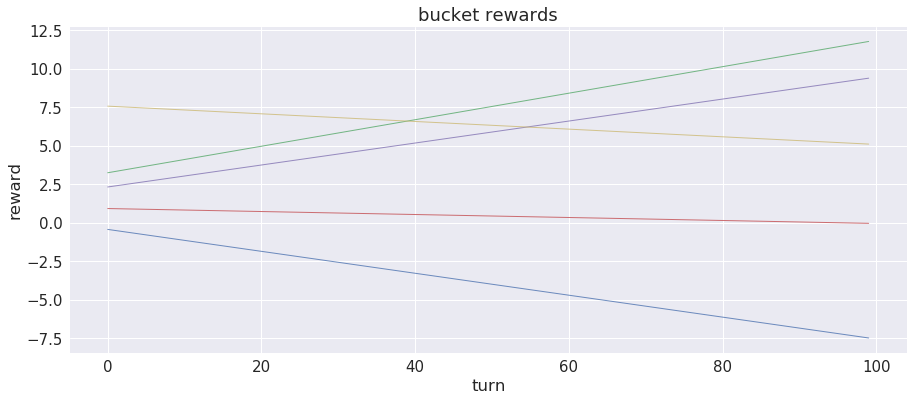

In [19]:
#plot bucket rewards versus turn
cols = ['turn'] + [col for col in game_history.columns if ('bucket' in col)]
df = game_history[cols].drop_duplicates()
cols = cols[1:]
fig, ax = plt.subplots(1,1, figsize=(15, 6))
p = ax.set_title('bucket rewards')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('reward')
for col in cols:
    p = ax.plot(df['turn'], df[col], alpha=0.8, linewidth=1)
print df.head(1)
print df.tail(1)

In [34]:
#play 10 games making random actions, and stash moves in memories queue
N_games = 100
strategy = 'random'
memories = play_N_games(environment, strategy, N_games)
print 'number of memories = ', len(memories)

number of memories =  30000


In [35]:
#build model
N_inputs = N_buckets
N_outputs = N_buckets
N_neurons = N_inputs*N_outputs*5
model = build_model(N_inputs, N_neurons, N_outputs)
print model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 125)               750       
_________________________________________________________________
activation_7 (Activation)    (None, 125)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 125)               15750     
_________________________________________________________________
activation_8 (Activation)    (None, 125)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 630       
_________________________________________________________________
activation_9 (Activation)    (None, 5)                 0         
Total params: 17,130
Trainable params: 17,130
Non-trainable params: 0
_________________________________________________________________
None


In [36]:
#train model
N_games = 100                                #number of games to be played during training
gamma = 0.85                                #discount for future rewards
batch_size = 20                             #number of memories used during experience-replay
debug = False                               #set True to see stats about each game's final turn
print 'batch_size = ', batch_size
print 'training model'
trained_model, game, rewards, epsilon = train(environment, model, N_games, gamma, memories, batch_size, debug=debug)
print '\ntraining done'

batch_size =  20
training model
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
training done


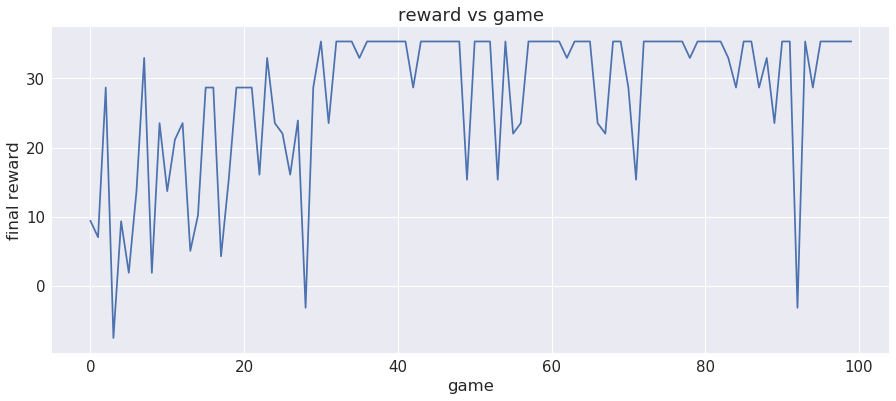

In [37]:
#plot rewards vs game
fig, ax = plt.subplots(1,1, figsize=(15, 6))
xp = game
yp = rewards
p = ax.plot(xp, yp)
p = ax.set_title('reward vs game')
p = ax.set_xlabel('game')
p = ax.set_ylabel('final reward')

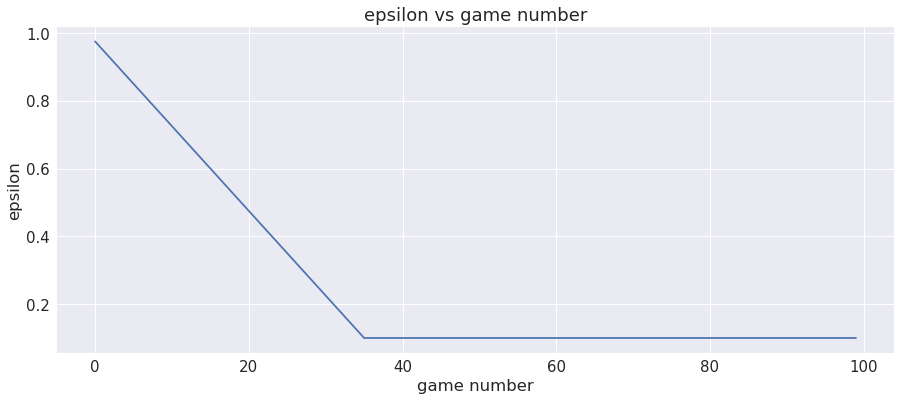

In [38]:
#plot epsilon vs game_number
fig, ax = plt.subplots(1,1, figsize=(15, 6))
xp = game
yp = epsilon
p = ax.plot(xp, yp)
p = ax.set_title('epsilon vs game number')
p = ax.set_xlabel('game number')
p = ax.set_ylabel('epsilon')

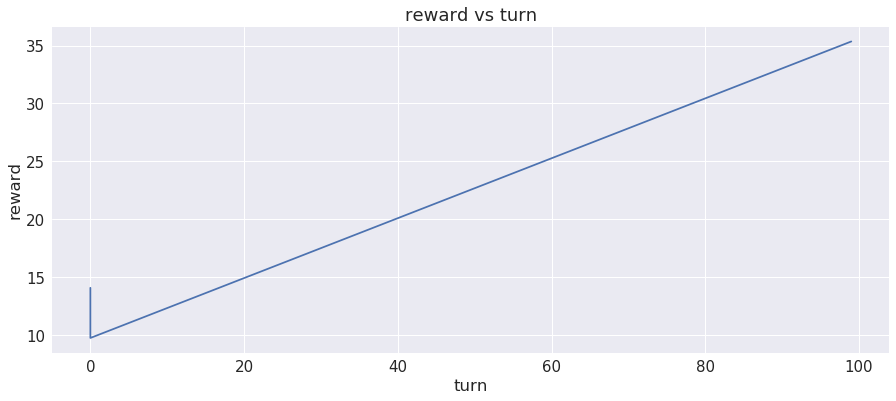

In [39]:
#play one smart game
strategy = 'smart'
memories = play_one_game(environment, turn, strategy, model=trained_model)
game_history = memories2timeseries(memories)
game_history.head()
fig, ax = plt.subplots(1,1, figsize=(15, 6))
xp = game_history['turn']
yp = game_history['reward']
p = ax.plot(xp, yp)
p = ax.set_title('reward vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('reward')

In [40]:
#done!
time_stop = time.time()
print 'execution time (minutes) = ', (time_stop - time_start)/60.0

execution time (minutes) =  9.90981370211
